# Libraries and data

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA

from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim, SparseRandomProjection

from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import FastICA
from scipy.stats import kurtosis, skew

In [3]:
from collections import Counter

In [4]:
df = pd.read_csv('/content/online_shoppers_intention.csv', sep=",")

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df['labels'] = df['Revenue'].apply(lambda x: 0 if x == False else 1)

category_col = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
df_category = df[category_col]

numerical_col = list(set(df.drop(['Revenue','labels'],axis=1).columns) - set(category_col))

df_numerical = df[numerical_col]

catg_encoder = OneHotEncoder()
df_category_onehot = catg_encoder.fit_transform(df_category)

scaling = StandardScaler()
df_numerical_scaled = scaling.fit_transform(df_numerical)

features = np.concatenate((df_numerical_scaled, df_category_onehot.toarray()), axis=1)
labels = df['labels']

In [7]:
len(features)

12330

In [8]:
len(features[0])

80

In [9]:
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=random_state)  # 0.33 0.2
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)

In [10]:
df['labels'].value_counts()

0    10422
1     1908
Name: labels, dtype: int64

In [11]:
def print_metrics(prediction, real):

    print("Accuracy:", accuracy_score(prediction, real))
    print("Precision:", precision_score(prediction, real))
    print("Recall:", recall_score(prediction, real))
    print("F1-Score:", f1_score(prediction, real))
    print("ROC-AUC:", roc_auc_score(prediction, real))

In [12]:
def plot_learning_curve_f1(model, X, y, title):    
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=5, 
                                                             scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)

    fig, ax = plt.subplots()

    ax.plot(np.linspace(0.1, 1.0, 10)*100, train_scores_mean, 'o-', color="r", label='Training Scores')
    ax.plot(np.linspace(0.1, 1.0, 10)*100, valid_scores_mean, 'o-', color="g", label='Validation Scores')

    ax.set_xlabel('Training Size (in percent)')
    ax.set_ylabel('Mean F1 Score')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)

# kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_train)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_train, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


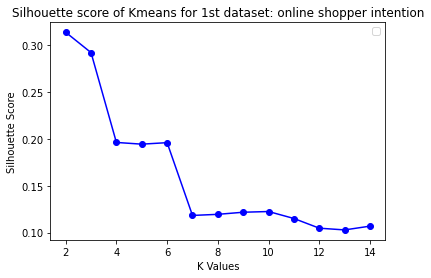

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 1st dataset: online shopper intention')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


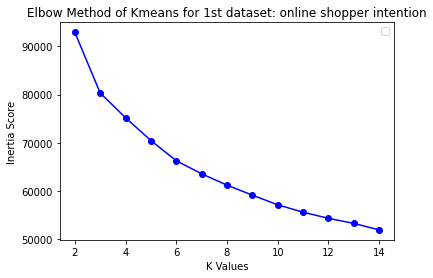

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 1st dataset: online shopper intention')
ax.legend()
plt.show(fig)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

0.7741193560101682


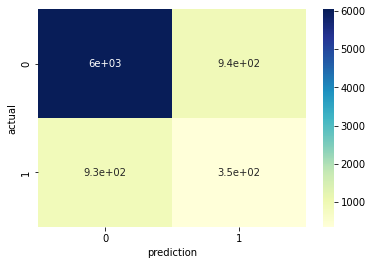

In [9]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [10]:
y_train.value_counts()

0    6986
1    1275
Name: labels, dtype: int64

In [12]:
kmean.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
from collections import Counter
Counter(kmean.labels_)

Counter({0: 6972, 1: 1289})

In [14]:
y_train

5396     0
611      0
4474     0
2114     0
8957     0
        ..
11964    0
5191     1
5390     0
860      0
7270     0
Name: labels, Length: 8261, dtype: int64

In [ ]:
from sklearn.metrics import homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score

In [ ]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.019516510343542914
V Measure: 0.019581437396227343
Completeness: 0.01964679788634535
Adjusted RandIndex: 0.09609207731314381


0.0993826413267159


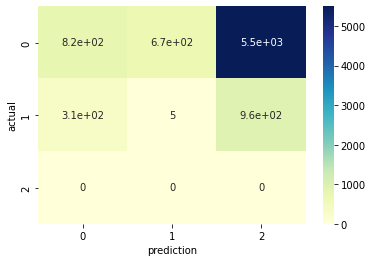

In [ ]:
kmean = KMeans(n_clusters=3)
kmean.fit(X_train)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [ ]:
best_kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.02633785373733427
V Measure: 0.03205534651644705
Completeness: 0.04094346504216424
Adjusted RandIndex: 0.01717055326594797


In [ ]:
best_kmeans = KMeans(n_clusters=4, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.03549757454286137
V Measure: 0.04920146669612968
Completeness: 0.08013940464223616
Adjusted RandIndex: 0.08544826321115649


In [ ]:
best_kmeans = KMeans(n_clusters=6, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.0612498504236254
V Measure: 0.08968739001469705
Completeness: 0.1674170176955503
Adjusted RandIndex: 0.1277496845327881


In [ ]:
best_kmeans = KMeans(n_clusters=7, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.04870223739473876
V Measure: 0.07532964549773753
Completeness: 0.16619481987410437
Adjusted RandIndex: 0.08034409608796267


# EM

In [ ]:
from sklearn.mixture import GaussianMixture

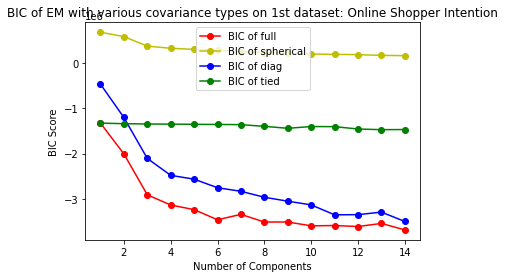

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o', 'm-o', 'k-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train)
        bic_em = em.bic(X_train)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 1st dataset: Online Shopper Intention')
ax.legend()
plt.show(fig)

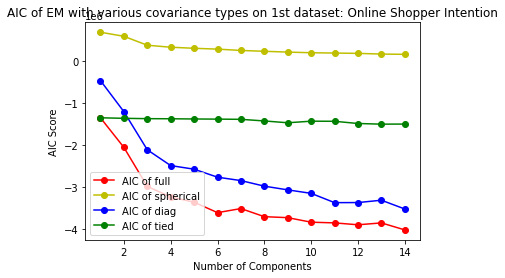

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o', 'm-o', 'k-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train)
        aic_em = em.aic(X_train)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 1st dataset: Online Shopper Intention')
ax.legend()
plt.show(fig)

0.029657426461687446


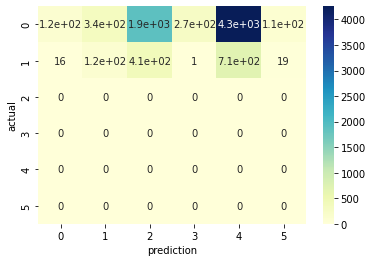

In [ ]:
em = GaussianMixture(n_components=6, covariance_type='full', random_state=random_state)
em.fit(X_train)
ypred = em.predict(X_train)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [ ]:
em = GaussianMixture(n_components=6,  covariance_type='full', random_state=random_state)
em.fit(features)

y_pred_em = em.predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.016426108810626668
V Measure: 0.022422209767674936
Completeness: 0.035312500487922664
Adjusted RandIndex: 0.0357797322789052


0.2954848081346084


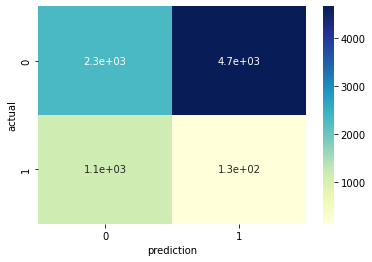

In [ ]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_train)
ypred = em.predict(X_train)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [ ]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(features)

y_pred_em = em.predict(X_train)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.13604134190553785
V Measure: 0.16671167843482215
Completeness: 0.21523644350373472
Adjusted RandIndex: 0.15457503158169625


# PCA

In [ ]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(X_train)
transformed = pca.transform(X_train)

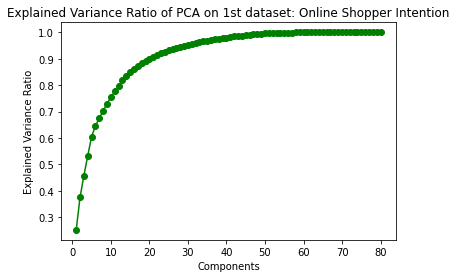

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ +1) , np.cumsum(pca.explained_variance_ratio_), "g-o")

ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Explained Variance Ratio of PCA on 1st dataset: Online Shopper Intention')
plt.show(fig)

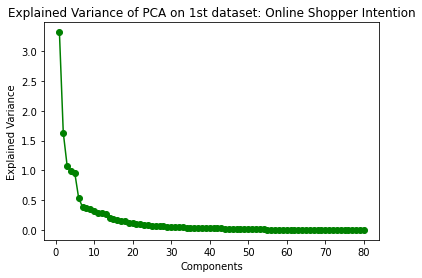

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(1, pca.n_components_ +1) , pca.explained_variance_, "g-o")

ax.set_xlabel('Components')
ax.set_ylabel('Explained Variance')
ax.set_title('Explained Variance of PCA on 1st dataset: Online Shopper Intention')
plt.show(fig)

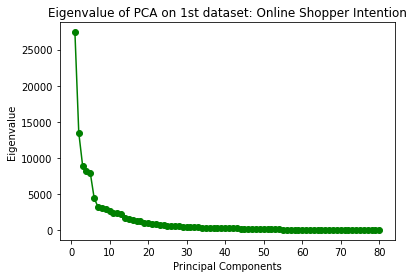

In [ ]:
fig, ax = plt.subplots()

ax.plot(range(1, pca.n_components_ +1) , [i**2 for i in pca.singular_values_], "g-o")

ax.set_xlabel('Principal Components')
ax.set_ylabel('Eigenvalue')
ax.set_title('Eigenvalue of PCA on 1st dataset: Online Shopper Intention')
plt.show(fig)

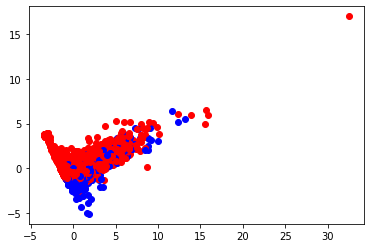

In [16]:
X = X_train
colors = ['red', 'blue']
pca = PCA(n_components=2)
pca.fit(X)
Xpca = pca.transform(X)

for x, y in zip(Xpca, y_train):
    plt.scatter(x[0], x[1], c=colors[y])

In [18]:
y_train.shape()

TypeError: ignored

In [23]:
list(y_train)[0]

0

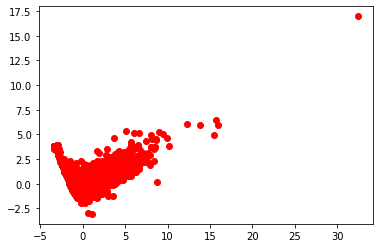

In [24]:
y_train_list = list(y_train)
i = 0
for x, y in zip(Xpca, y_train):
  if y_train_list[i]==0:
    plt.scatter(x[0], x[1], c=colors[y])
  i = i+1  

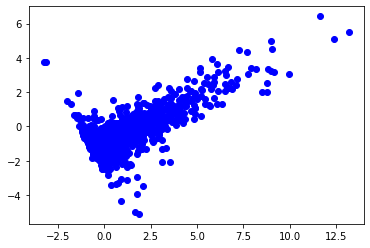

In [25]:
#y_train_list = list(y_train)
i = 0
for x, y in zip(Xpca, y_train):
  if y_train_list[i]==1:
    plt.scatter(x[0], x[1], c=colors[y])
  i = i+1  

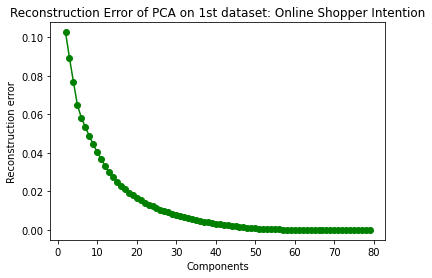

In [ ]:
reconstruct_error_list = []
variance_list = []

for i in range(2, 80):
    pca = PCA(n_components=i)
    pca.fit(X_train)

    X_pca = pca.transform(X_train)

    X_reconstruct = pca.inverse_transform(X_pca)

    reconstruct_error =  ((X_train - X_reconstruct) ** 2).mean()
    reconstruct_error_list.append(reconstruct_error)

    variance = np.mean(pca.explained_variance_)
    variance_list.append(variance)

fig, ax = plt.subplots()
ax.plot(range(2, 80), reconstruct_error_list, "g-o")

ax.set_xlabel('Components')
ax.set_ylabel('Reconstruction error')
ax.set_title('Reconstruction Error of PCA on 1st dataset: Online Shopper Intention')
plt.show(fig)

# PCA + Kmeans

In [ ]:
pca_final = PCA(n_components=3)
pca_final.fit(X_train)
X_pca_final = pca_final.transform(X_train)

No handles with labels found to put in legend.


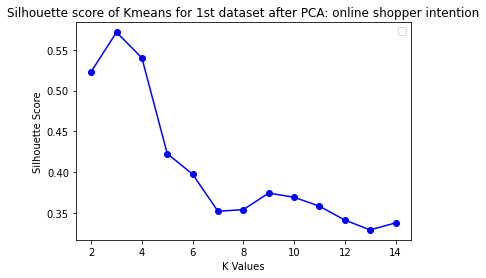

In [ ]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_pca_final)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_pca_final, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 1st dataset after PCA: online shopper intention')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


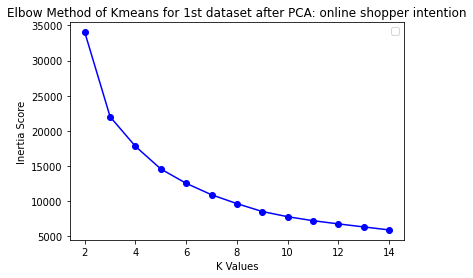

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 1st dataset after PCA: online shopper intention')
ax.legend()
plt.show(fig)

0.22321752814429247


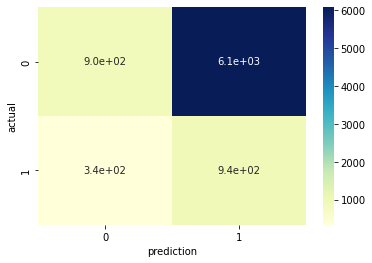

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_pca_final)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [ ]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_pca_final)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.019068344133307623
V Measure: 0.018910434517471222
Completeness: 0.018755118797159038
Adjusted RandIndex: 0.09466132766740075


In [13]:
pca_final = PCA(n_components=5)
pca_final.fit(X_train)
X_pca_final = pca_final.transform(X_train)

0.7744825081709236


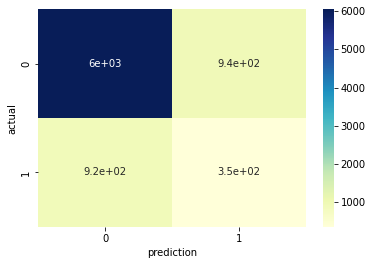

In [14]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_pca_final)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

# PCA + EM

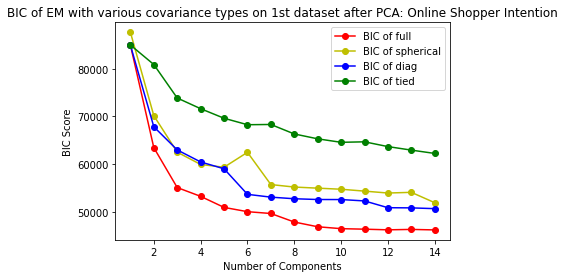

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o', 'm-o', 'k-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_pca_final)
        bic_em = em.bic(X_pca_final)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 1st dataset after PCA: Online Shopper Intention')
ax.legend()
plt.show(fig)

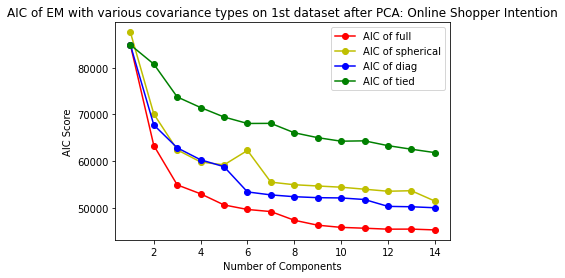

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o', 'm-o', 'k-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_pca_final)
        aic_em = em.aic(X_pca_final)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 1st dataset after PCA: Online Shopper Intention')
ax.legend()
plt.show(fig)

0.5375862486381794


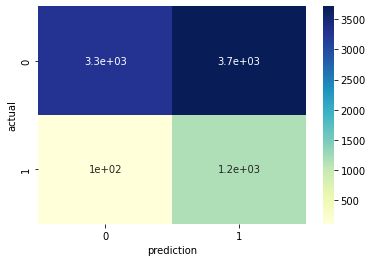

In [ ]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_pca_final)
ypred = em.predict(X_pca_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [ ]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(X_pca_final)

y_pred_em = em.predict(X_pca_final)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.07164137143994007
V Measure: 0.08757272317205016
Completeness: 0.11261582784710657
Adjusted RandIndex: -0.01069954702960476


0.2644958237501513


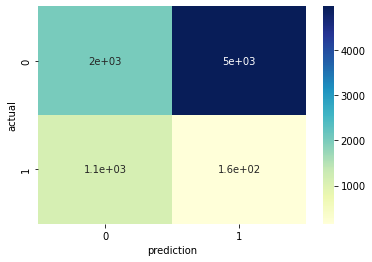

In [21]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_pca_final)
ypred = em.predict(X_pca_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

# ICA

In [ ]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis, skew

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tole

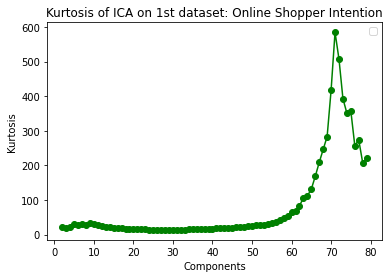

In [ ]:
kurtosis_ica = []

for i in range(2, 80):
    ica = FastICA(n_components=i, random_state=random_state)
    X_train_ica = ica.fit_transform(X_train)
    kurtosis_mean = np.mean(kurtosis(X_train_ica))
    kurtosis_ica.append(kurtosis_mean)

fig, ax = plt.subplots()
ax.plot(range(2, 80) , kurtosis_ica, "g-o")
ax.set_xlabel('Components')
ax.set_ylabel('Kurtosis')
ax.set_title('Kurtosis of ICA on 1st dataset: Online Shopper Intention')
ax.legend()
plt.show(fig)

# ICA + kmeans

In [ ]:
ica_final = FastICA(n_components=9, random_state=random_state)
X_train_ica = ica_final.fit_transform(X_train)

In [ ]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_train_ica)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_train_ica, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


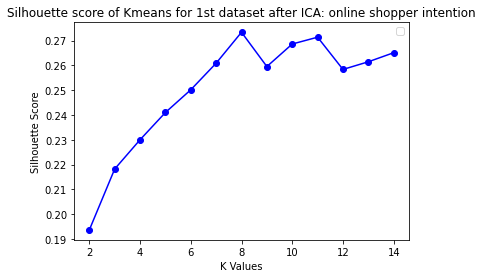

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 1st dataset after ICA: online shopper intention')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


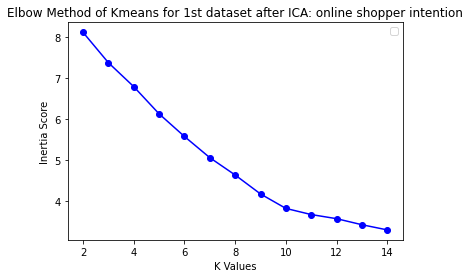

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 1st dataset after ICA: online shopper intention')
ax.legend()
plt.show(fig)

0.6961626921680184


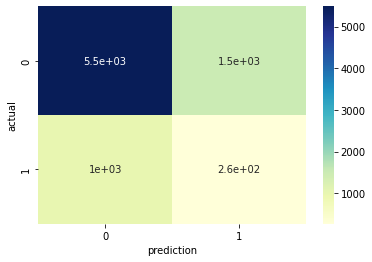

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_ica)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [ ]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train_ica)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 3.4109430189204695e-05
V Measure: 3.728888036525723e-05
Completeness: 4.1121994295227615e-05
Adjusted RandIndex: -0.003336536399177587


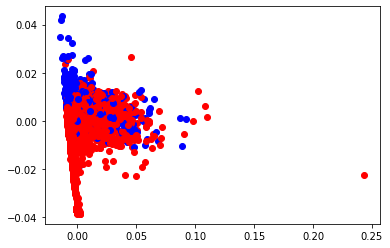

In [ ]:
X_train_ica = FastICA(n_components=2).fit_transform(X_train)
colors = ['red', 'blue']

for x, y in zip(X_train_ica, y_train):
    plt.scatter(x[0], x[1], c=colors[y])

In [15]:
ica_final = FastICA(n_components=6, random_state=random_state)
X_train_ica = ica_final.fit_transform(X_train)

0.31025299600532624


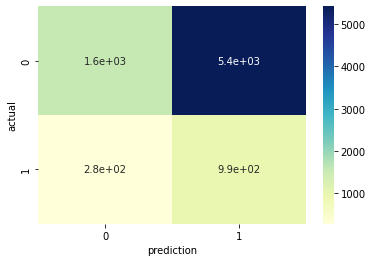

In [16]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_ica)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

# ICA + EM

In [ ]:
ica_final = FastICA(n_components=9, random_state=random_state)
X_ica_final = ica_final.fit_transform(X_train)

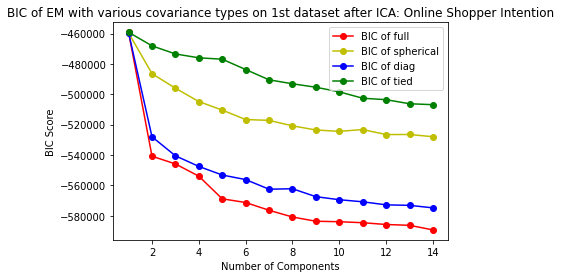

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_ica_final)
        bic_em = em.bic(X_ica_final)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 1st dataset after ICA: Online Shopper Intention')
ax.legend()
plt.show(fig)

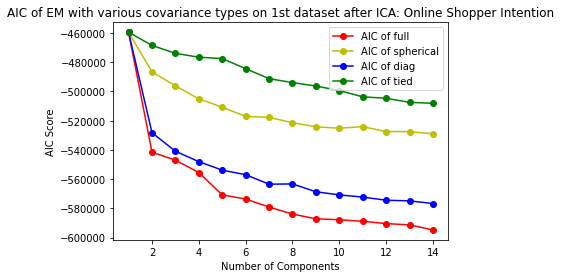

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_ica_final)
        aic_em = em.aic(X_ica_final)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 1st dataset after ICA: Online Shopper Intention')
ax.legend()
plt.show(fig)

0.27333252632853167


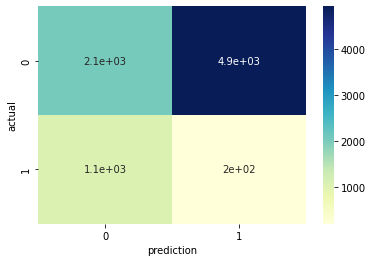

In [ ]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)

em.fit(X_ica_final)
ypred = em.predict(X_ica_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [ ]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(X_ica_final)

y_pred_em = em.predict(X_ica_final)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.1268675459255902
V Measure: 0.15396395995555137
Completeness: 0.1957783718538968
Adjusted RandIndex: 0.1827769272095532


In [23]:
ica_final = FastICA(n_components=6, random_state=random_state)
X_ica_final = ica_final.fit_transform(X_train)

0.2653431787919138


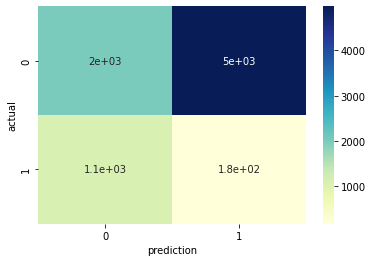

In [24]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)

em.fit(X_ica_final)
ypred = em.predict(X_ica_final)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

# Randomized Projections

In [ ]:
from sklearn.random_projection import GaussianRandomProjection, johnson_lindenstrauss_min_dim, SparseRandomProjection

In [ ]:
def run_rp():
    err_list = []

    for i in range(2, 15):
        rp = GaussianRandomProjection(n_components=i)
        rp.fit(X_train)
        X_transformed = rp.transform(X_train)

        X_reconstruct = X_transformed.dot(rp.components_) + np.mean(X_train, axis=0)

        error = np.mean((X_train - X_reconstruct)**2)

        err_list.append(error)

    return err_list

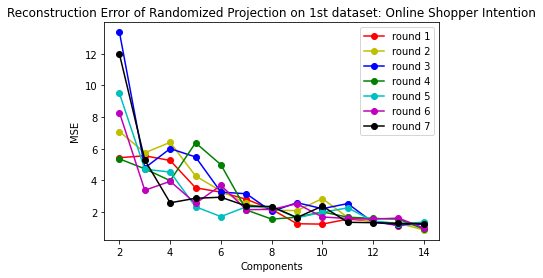

In [ ]:
fig, ax = plt.subplots()
color = ['r-o', 'y-o', 'b-o', 'g-o', 'c-o', 'm-o', 'k-o']

for i in range(0, 7):
    err = run_rp()
    ax.plot(range(2, 15), err, color[i], label=f'round {i+1}')

ax.set_xlabel('Components')
ax.set_ylabel('MSE')
ax.set_title('Reconstruction Error of Randomized Projection on 1st dataset: Online Shopper Intention')
ax.legend()
plt.show(fig)

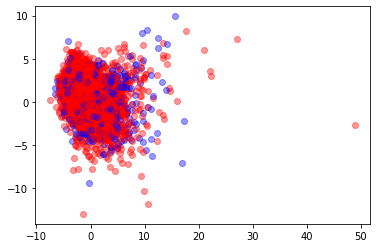

In [ ]:
rp = GaussianRandomProjection(n_components=2, eps=0.1, random_state=random_state)
rp.fit(X_train)
X_train_rp = rp.transform(X_train)
colors = ['red', 'blue']

for x, y in zip(X_train_rp, y_train):
    plt.scatter(x[0], x[1], c=colors[y], alpha=0.4)

No handles with labels found to put in legend.


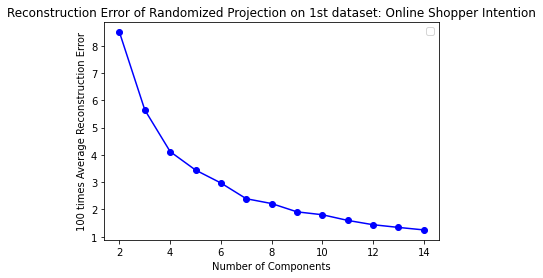

In [ ]:
# 100 times
err_list = []

for i in range(2, 15):
    recontruct_err = []    
    for j in range(1, 101):
        rp = GaussianRandomProjection(n_components=i)
        rp.fit(X_train)
        X_transformed = rp.transform(X_train)
        X_reconstructed = X_transformed.dot(rp.components_) + np.mean(X_train, axis=0)
        error = np.mean((X_train - X_reconstructed)**2)
        recontruct_err.append(error)
    err_list.append(np.mean(recontruct_err))
    
fig, ax = plt.subplots()
ax.plot(range(2, 15) , err_list, "b-o")
ax.set_xlabel('Number of Components')
ax.set_ylabel('100 times Average Reconstruction Error')
ax.set_title('Reconstruction Error of Randomized Projection on 1st dataset: Online Shopper Intention')
ax.legend()
plt.show(fig)

# Randomized Projection + Kmeans

In [ ]:
final_rp = GaussianRandomProjection(n_components=12)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)

In [ ]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_train_rp)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_train_rp, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


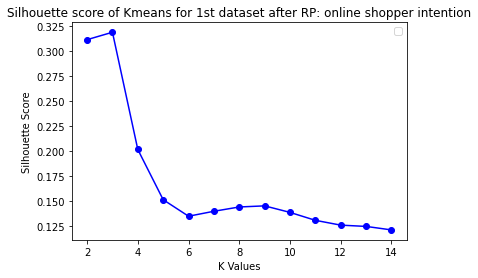

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 1st dataset after RP: online shopper intention')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


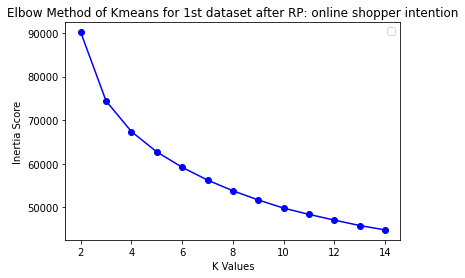

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 1st dataset after RP: online shopper intention')
ax.legend()
plt.show(fig)

0.7804139934632611


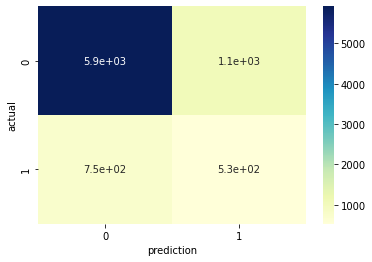

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_rp)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [ ]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_train_rp)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.04962223008196765
V Measure: 0.052847018633114994
Completeness: 0.056520075918765865
Adjusted RandIndex: 0.16335004751697352


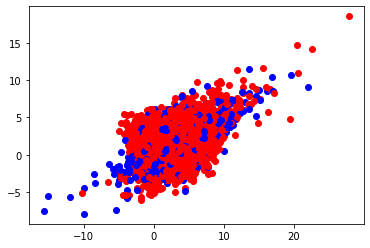

In [ ]:
X_train_rp = GaussianRandomProjection(n_components=2).fit_transform(X_train)
colors = ['red', 'blue']

for x, y in zip(X_train_rp, y_train):
    plt.scatter(x[0], x[1], c=colors[y])

In [17]:
final_rp = GaussianRandomProjection(n_components=7)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)

0.5350441835128918


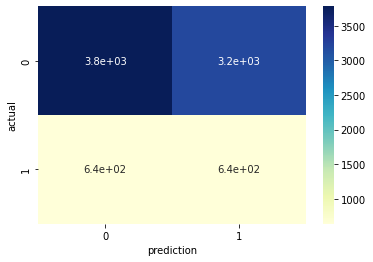

In [18]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_rp)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [19]:
final_rp = GaussianRandomProjection(n_components=14)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)

0.7576564580559254


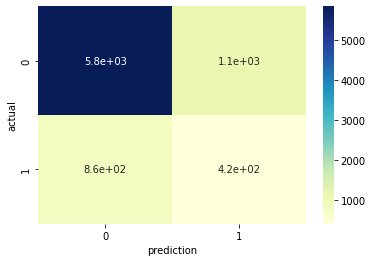

In [20]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train_rp)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

# Randomized Projection + EM

In [ ]:
final_rp = GaussianRandomProjection(n_components=12)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)

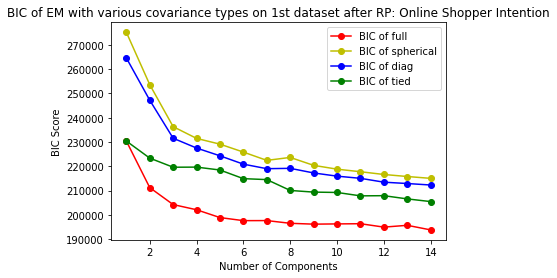

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train_rp)
        bic_em = em.bic(X_train_rp)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 1st dataset after RP: Online Shopper Intention')
ax.legend()
plt.show(fig)

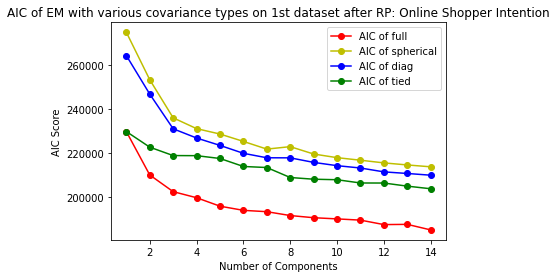

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_train_rp)
        aic_em = em.aic(X_train_rp)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 1st dataset after RP: Online Shopper Intention')
ax.legend()
plt.show(fig)

0.7718193923253843


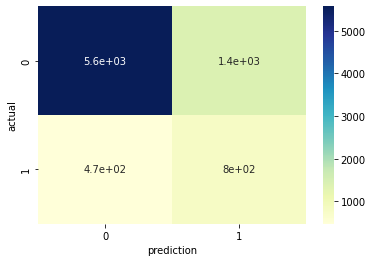

In [ ]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)

em.fit(X_train_rp)
ypred = em.predict(X_train_rp)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [ ]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(X_train_rp)

y_pred_em = em.predict(X_train_rp)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.09242231010348949
V Measure: 0.1062108077724565
Completeness: 0.12483495214557946
Adjusted RandIndex: 0.21451744098921494


# Other method: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(random_forest.feature_importances_)

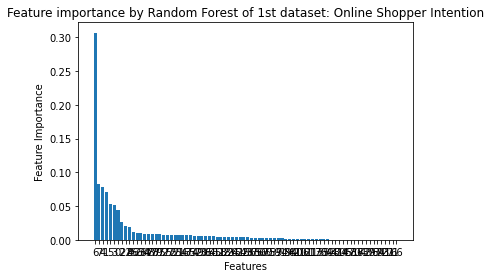

In [ ]:
plt.bar([str(i) for i in ascending_order[::-1]], random_forest.feature_importances_[ascending_order[::-1]])
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title('Feature importance by Random Forest of 1st dataset: Online Shopper Intention')
plt.show()

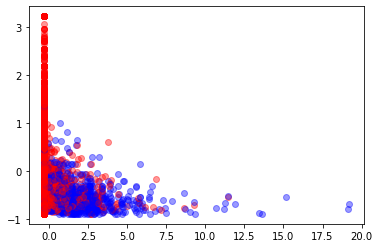

In [ ]:
colors = ['red', 'blue']
important_features = ascending_order[::-1][:2]
X_sub = X_train[:,important_features]

for x, y in zip(X_sub, y_train):
    plt.scatter(x[0], x[1], c=colors[y], alpha=0.4)

plt.show()

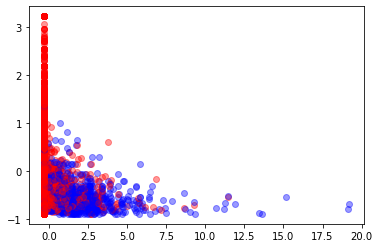

In [ ]:
colors = ['red', 'blue']
important_features = ascending_order[::-1][:4]
X_sub = X_train[:,important_features]

for x, y in zip(X_sub, y_train):
    plt.scatter(x[0], x[1], c=colors[y], alpha=0.4)

plt.show()

# Random Forest + Kmeans

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(rf.feature_importances_)
important_features = ascending_order[::-1][:2]
X_sub = X_train[:,important_features]

In [ ]:
k_range = range(2, 15)
kmean_classifiers = []

for i in k_range:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit(X_sub)
    kmean_classifiers.append(kmean)
  
silhouette = [silhouette_score(X_sub, kmean.labels_) for kmean in kmean_classifiers]

inertia = [ kmean.inertia_ for kmean in kmean_classifiers]

No handles with labels found to put in legend.


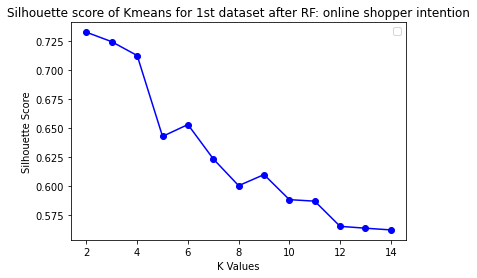

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range , silhouette, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette score of Kmeans for 1st dataset after RF: online shopper intention')
ax.legend()
plt.show(fig)

No handles with labels found to put in legend.


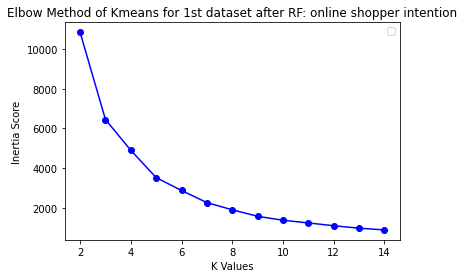

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, inertia, "b-o")
ax.set_xlabel('K Values')
ax.set_ylabel('Inertia Score')
ax.set_title('Elbow Method of Kmeans for 1st dataset after RF: online shopper intention')
ax.legend()
plt.show(fig)

0.8760440624621717


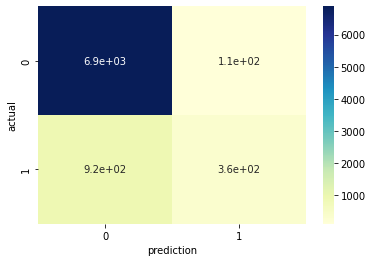

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_sub)

cm = confusion_matrix(y_train, kmean.labels_)

sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, kmean.labels_))

In [ ]:
best_kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred_kmeans = best_kmeans.fit_predict(X_sub)

print("Homogenity:", homogeneity_score(y_pred_kmeans, y_train))
print("V Measure:", v_measure_score(y_pred_kmeans, y_train))
print("Completeness:", completeness_score(y_pred_kmeans, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_kmeans, y_train))

Homogenity: 0.2678371493049879
V Measure: 0.17941345326755626
Completeness: 0.13488315793996195
Adjusted RandIndex: 0.30347162773843434


# Random Forest + EM

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(rf.feature_importances_)
important_features = ascending_order[::-1][:2]
X_sub = X_train[:,important_features]

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/l

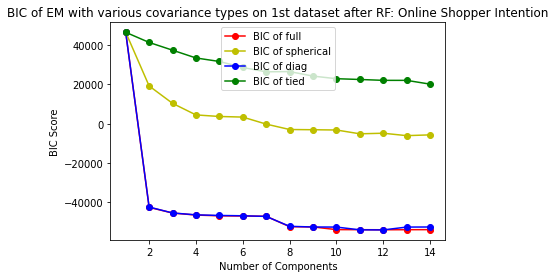

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    bic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_sub)
        bic_em = em.bic(X_sub)
        bic_em_list.append(bic_em)

    ax.plot(components_range , bic_em_list, color[k], label=f'BIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('BIC Score')
ax.set_title('BIC of EM with various covariance types on 1st dataset after RF: Online Shopper Intention')
ax.legend()
plt.show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/l

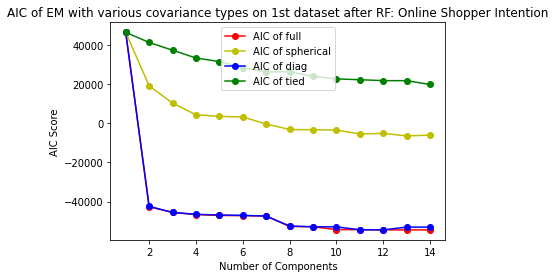

In [ ]:
components_range = range(1, 15)

fig, ax = plt.subplots()

color = ['r-o', 'y-o', 'b-o', 'g-o']
k = 0

for i in ['full', 'spherical', 'diag', 'tied']:
    aic_em_list = []

    for j in components_range:
        em = GaussianMixture(n_components=j, random_state=random_state, covariance_type=i)
        em.fit(X_sub)
        aic_em = em.aic(X_sub)
        aic_em_list.append(aic_em)

    ax.plot(components_range , aic_em_list, color[k], label=f'AIC of {i}')

    k = k+1
    
ax.set_xlabel('Number of Components')
ax.set_ylabel('AIC Score')
ax.set_title('AIC of EM with various covariance types on 1st dataset after RF: Online Shopper Intention')
ax.legend()
plt.show(fig)

0.8598232659484324


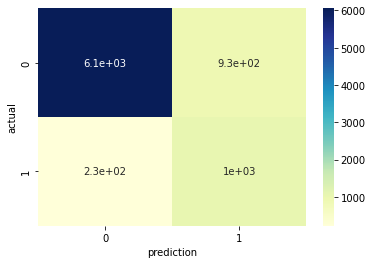

In [ ]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)

em.fit(X_sub)
ypred = em.predict(X_sub)

cm = confusion_matrix(y_train, ypred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

plt.ylabel('actual')
plt.xlabel('prediction')
print(accuracy_score(y_train, ypred))

In [ ]:
em = GaussianMixture(n_components=2,  covariance_type='full', random_state=random_state)
em.fit(X_sub)

y_pred_em = em.predict(X_sub)

print("Homogenity:", homogeneity_score(y_pred_em, y_train))
print("V Measure:", v_measure_score(y_pred_em, y_train))
print("Completeness:", completeness_score(y_pred_em, y_train))
print("Adjusted RandIndex:", adjusted_rand_score(y_pred_em, y_train))

Homogenity: 0.2657497187215577
V Measure: 0.29837669712606485
Completeness: 0.34013637291016197
Adjusted RandIndex: 0.44603324152211693


# + NN

## Helper function:

In [ ]:
def print_metrics(prediction, real):

    print("Accuracy:", accuracy_score(prediction, real))
    print("Precision:", precision_score(prediction, real))
    print("Recall:", recall_score(prediction, real))
    print("F1-Score:", f1_score(prediction, real))
    print("ROC-AUC:", roc_auc_score(prediction, real))

In [ ]:
def plot_learning_curve_f1(model, X, y, title):    
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=5, 
                                                             scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)

    fig, ax = plt.subplots()

    ax.plot(np.linspace(0.1, 1.0, 10)*100, train_scores_mean, 'o-', color="r", label='Training Scores')
    ax.plot(np.linspace(0.1, 1.0, 10)*100, valid_scores_mean, 'o-', color="g", label='Validation Scores')

    ax.set_xlabel('Training Size (in percent)')
    ax.set_ylabel('Mean F1 Score')
    ax.set_title(title)
    ax.legend()
    plt.show(fig)

## NN:

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(X_train, y_train)
nn_grid_clf_best = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best.fit(X_train, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best.predict(X_train)
pred_nn_test = nn_grid_clf_best.predict(X_test)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best)

nn_model = nn_grid_clf.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 5.2340240478515625
Accuracy: 0.8960174313037162
Precision: 0.6949019607843138
Recall: 0.6533923303834809
F1-Score: 0.6735081717977955
ROC-AUC: 0.7985281709846441
Training performance is: None
Accuracy: 0.8923568444335217
Precision: 0.6808846761453397
Recall: 0.6461769115442278
F1-Score: 0.663076923076923
ROC-AUC: 0.7934000371948065
Testing performance is: None
Best Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
nn_model

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


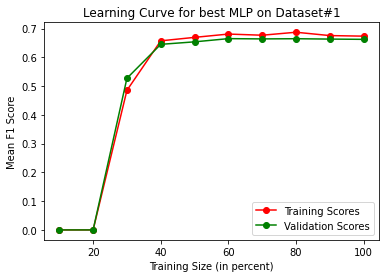

In [ ]:
plot_learning_curve_f1(nn_model, X_train, y_train, 'Learning Curve for best MLP on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


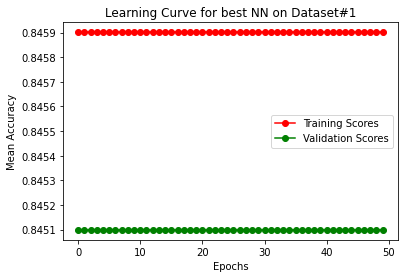

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best.activation, 
                    hidden_layer_sizes=nn_grid_clf_best.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN on Dataset#1')
ax.legend()
plt.show(fig)

## PCA + NN:

In [ ]:
pca_final = PCA(n_components=3, random_state = random_state)
pca_final.fit(X_train)
X_train_pca = pca_final.transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(X_train_pca, y_train)
nn_grid_clf_best_pca = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best_pca.fit(X_train_pca, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best_pca.predict(X_train_pca)
pred_nn_test = nn_grid_clf_best_pca.predict(X_test_pca)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 18.63229274749756
Accuracy: 0.884880765040552
Precision: 0.3262745098039216
Recall: 0.8188976377952756
F1-Score: 0.4666292765002804
ROC-AUC: 0.8540509084113743
Training performance is: None
Accuracy: 0.8817891373801917
Precision: 0.3048973143759874
Recall: 0.8247863247863247
F1-Score: 0.4452133794694348
ROC-AUC: 0.8550267999420542
Testing performance is: None
Best Model: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
nn_grid_clf_best_pca

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


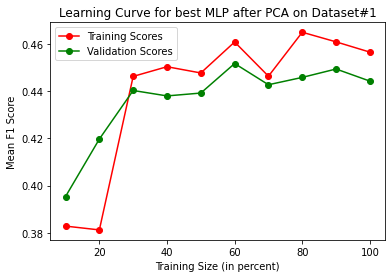

In [ ]:
plot_learning_curve_f1(nn_grid_clf_best_pca, X_train_pca, y_train, 'Learning Curve for best MLP after PCA on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


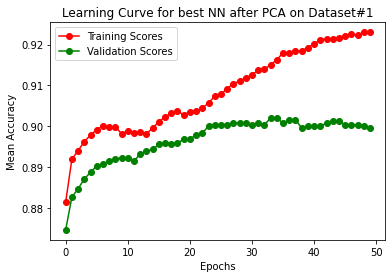

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best_pca.activation, 
                    hidden_layer_sizes=nn_grid_clf_best_pca.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN after PCA on Dataset#1')
ax.legend()
plt.show(fig)

## ICA + NN

In [ ]:
final_ica = FastICA(n_components=2, random_state=random_state)
final_ica.fit(X_train)
X_train_ica = final_ica.transform(X_train)
X_test_ica = final_ica.transform(X_test)

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(X_train_ica, y_train)
nn_grid_clf_best_ica = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best_ica.fit(X_train_ica, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best_ica.predict(X_train_ica)
pred_nn_test = nn_grid_clf_best_ica.predict(X_test_ica)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best_ica)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 2.6786680221557617
Accuracy: 0.8627284832344753
Precision: 0.1992156862745098
Recall: 0.6920980926430518
F1-Score: 0.3093788063337393
ROC-AUC: 0.781379677180406
Training performance is: None
Accuracy: 0.8682723027770951
Precision: 0.2037914691943128
Recall: 0.8012422360248447
F1-Score: 0.3249370277078086
ROC-AUC: 0.8361380064464039
Testing performance is: None
Best Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
nn_grid_clf_best_ica

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


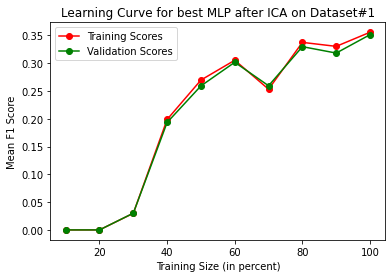

In [ ]:
plot_learning_curve_f1(nn_grid_clf_best_ica, X_train_ica, y_train, 'Learning Curve for best MLP after ICA on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


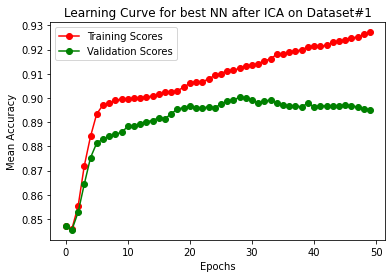

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best_ica.activation, 
                    hidden_layer_sizes=nn_grid_clf_best_ica.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN after ICA on Dataset#1')
ax.legend()
plt.show(fig)

## RP + NN

In [ ]:
final_rp = GaussianRandomProjection(n_components=12)
final_rp.fit(X_train)
X_train_rp = final_rp.transform(X_train)
X_test_rp = final_rp.transform(X_test)

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(X_train_rp, y_train)
nn_grid_clf_best_rp = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best_rp.fit(X_train_rp, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best_rp.predict(X_train_rp)
pred_nn_test = nn_grid_clf_best_rp.predict(X_test_rp)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best_rp)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 7.0661420822143555
Accuracy: 0.8974700399467377
Precision: 0.48470588235294115
Recall: 0.7648514851485149
F1-Score: 0.5933749399903985
ROC-AUC: 0.8383495316524809
Training performance is: None
Accuracy: 0.8650774145981813
Precision: 0.3696682464454976
Recall: 0.609375
F1-Score: 0.46017699115044247
ROC-AUC: 0.7505491010854817
Testing performance is: None
Best Model: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
nn_grid_clf_best_rp

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


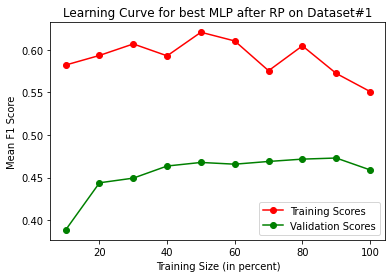

In [ ]:
plot_learning_curve_f1(nn_grid_clf_best_rp, X_train_rp, y_train, 'Learning Curve for best MLP after RP on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


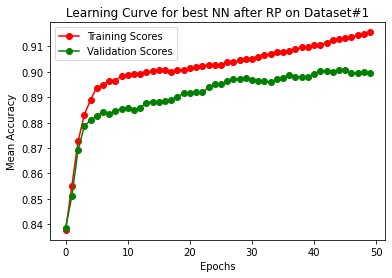

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best_rp.activation, 
                    hidden_layer_sizes=nn_grid_clf_best_rp.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN after RP on Dataset#1')
ax.legend()
plt.show(fig)

## RF + NN

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
ascending_order = np.argsort(rf.feature_importances_)
important_features = ascending_order[::-1][:2]
X_sub_train = X_train[:,important_features]
X_sub_test = X_test[:,important_features]

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(X_sub_train, y_train)
nn_grid_clf_best_rf = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best_rf.fit(X_sub_train, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best_rf.predict(X_sub_train)
pred_nn_test = nn_grid_clf_best_rf.predict(X_sub_test)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 1.8497843742370605
Accuracy: 0.8886333373683574
Precision: 0.672156862745098
Recall: 0.6306107431935246
F1-Score: 0.6507213363705391
ROC-AUC: 0.7850242936483416
Training performance is: None
Accuracy: 0.8898992381420496
Precision: 0.6761453396524486
Recall: 0.6378539493293591
F1-Score: 0.6564417177914109
ROC-AUC: 0.7887621718394883
Testing performance is: None
Best Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
nn_grid_clf_best_rf

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


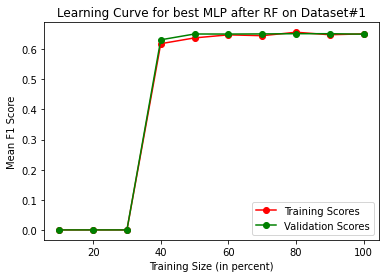

In [ ]:
plot_learning_curve_f1(nn_grid_clf_best_rf, X_sub_train, y_train, 'Learning Curve for best MLP after RF on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


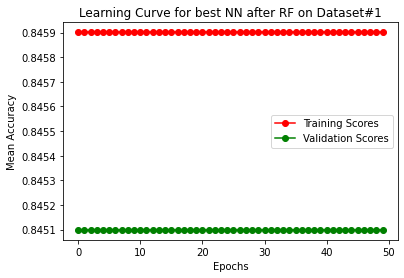

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best_rf.activation, 
                    hidden_layer_sizes=nn_grid_clf_best_rf.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN after RF on Dataset#1')
ax.legend()
plt.show(fig)

# Kmeans + NN

In [ ]:
kmean = KMeans(n_clusters=2, random_state=random_state)
kmean.fit(X_train)

y_train_kmean = kmean.predict(X_train)
y_test_kmean = kmean.predict(X_test)

In [ ]:
data_with_clusters_df = pd.DataFrame(np.c_[X_train, y_train_kmean])
df_x = data_with_clusters_df.drop(data_with_clusters_df.columns[-1])
df_y = OneHotEncoder().fit_transform(data_with_clusters_df[[data_with_clusters_df.columns[-1]]])

x_train_with_clusters = np.concatenate((X_train, df_y.toarray()), axis=1)

In [ ]:
data_with_clusters_df = pd.DataFrame(np.c_[X_test, y_test_kmean])
df_x = data_with_clusters_df.drop(data_with_clusters_df.columns[-1])
df_y = OneHotEncoder().fit_transform(data_with_clusters_df[[data_with_clusters_df.columns[-1]]])

x_test_with_clusters = np.concatenate((X_test, df_y.toarray()), axis=1)

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(x_train_with_clusters, y_train)
nn_grid_clf_best_kmeans = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best_kmeans.fit(x_train_with_clusters, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best_kmeans.predict(x_train_with_clusters)
pred_nn_test = nn_grid_clf_best_kmeans.predict(x_test_with_clusters)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best_kmeans)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 8.223291635513306
Accuracy: 0.8940806197796877
Precision: 0.7231372549019608
Recall: 0.6385041551246537
F1-Score: 0.6781905112173593
ROC-AUC: 0.7933609230955526
Training performance is: None
Accuracy: 0.8896534775129025
Precision: 0.7093206951026856
Recall: 0.6288515406162465
F1-Score: 0.6666666666666666
ROC-AUC: 0.7870040117388236
Testing performance is: None
Best Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
nn_grid_clf_best_kmeans

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


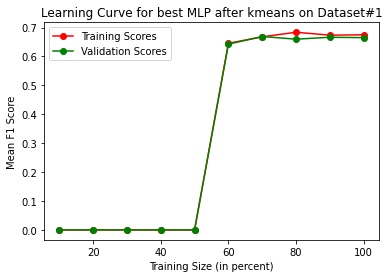

In [ ]:
plot_learning_curve_f1(nn_grid_clf_best_kmeans, x_train_with_clusters, y_train, 'Learning Curve for best MLP after kmeans on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


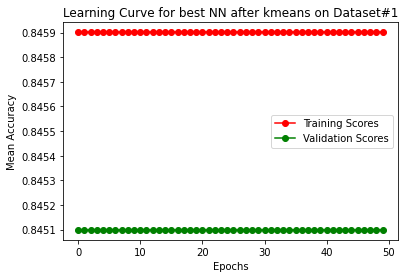

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best_kmeans.activation, 
                    hidden_layer_sizes=nn_grid_clf_best_kmeans.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN after kmeans on Dataset#1')
ax.legend()
plt.show(fig)

# EM + NN

In [ ]:
em = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state)
em.fit(X_train)

y_train_em = em.predict(X_train)
y_test_em = em.predict(X_test)

In [ ]:
data_with_clusters_df = pd.DataFrame(np.c_[X_train, y_train_em])
df_x = data_with_clusters_df.drop(data_with_clusters_df.columns[-1])
df_y = OneHotEncoder().fit_transform(data_with_clusters_df[[data_with_clusters_df.columns[-1]]])

x_train_with_clusters = np.concatenate((X_train, df_y.toarray()), axis=1)

In [ ]:
data_with_clusters_df = pd.DataFrame(np.c_[X_test, y_test_em])
df_x = data_with_clusters_df.drop(data_with_clusters_df.columns[-1])
df_y = OneHotEncoder().fit_transform(data_with_clusters_df[[data_with_clusters_df.columns[-1]]])

x_test_with_clusters = np.concatenate((X_test, df_y.toarray()), axis=1)

In [ ]:
param_grid = [{
    'activation': ['relu', 'logistic', 'tanh'],
    'hidden_layer_sizes':[(16),(32),(16,8),(16,2),(32,16),(64,32)]
    }]

nn_clf = MLPClassifier(solver='adam', max_iter=200, random_state=random_state)
nn_grid_clf = GridSearchCV(nn_clf, param_grid, cv=5,
                               scoring='f1', return_train_score=True)
    
nn_grid_clf.fit(x_train_with_clusters, y_train)
nn_grid_clf_best_em = nn_grid_clf.best_estimator_

start_time = time.time()
nn_grid_clf_best_em.fit(x_train_with_clusters, y_train)
stop_time = time.time()

print("Training time is:", (stop_time - start_time))

pred_nn_train = nn_grid_clf_best_em.predict(x_train_with_clusters)
pred_nn_test = nn_grid_clf_best_em.predict(x_test_with_clusters)

print("Training performance is:", print_metrics(pred_nn_train, y_train))
print("Testing performance is:", print_metrics(pred_nn_test, y_test))

print("Best Model:", nn_grid_clf_best_em)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time is: 8.250343561172485
Accuracy: 0.8983173949885002
Precision: 0.6862745098039216
Recall: 0.6653992395437263
F1-Score: 0.6756756756756757
ROC-AUC: 0.803906069527118
Training performance is: None
Accuracy: 0.8930941263209634
Precision: 0.6777251184834123
Recall: 0.65
F1-Score: 0.6635730858468677
ROC-AUC: 0.7950792021120563
Testing performance is: None
Best Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
nn_grid_clf_best_em

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


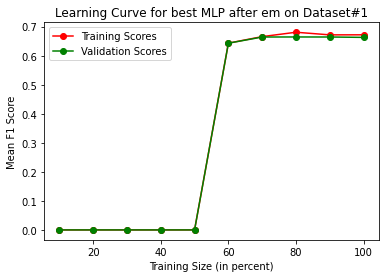

In [ ]:
plot_learning_curve_f1(nn_grid_clf_best_em, x_train_with_clusters, y_train, 'Learning Curve for best MLP after em on Dataset#1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


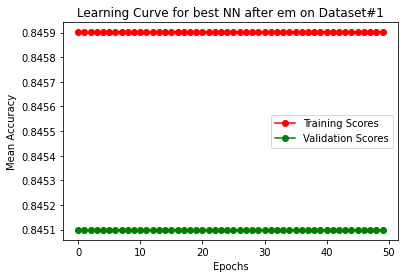

In [ ]:
clf = MLPClassifier(activation=nn_grid_clf_best_em.activation, 
                    hidden_layer_sizes=nn_grid_clf_best_em.hidden_layer_sizes, 
                    random_state=random_state, 
                    max_iter=1, 
                    warm_start=True)

training_accuracy = []
validation_accuracy = []

epochs = range(50)
for i in epochs:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_validation)
    valid_score = accuracy_score(y_validation, y_pred)

    training_accuracy.append(clf.score(X_training, y_training))
    validation_accuracy.append(valid_score)
    
fig, ax = plt.subplots()

ax.plot(list(epochs), training_accuracy, 'o-', color="r", label='Training Scores')
ax.plot(list(epochs), validation_accuracy, 'o-', color="g", label='Validation Scores')

ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Learning Curve for best NN after em on Dataset#1')
ax.legend()
plt.show(fig)